# GARCH Model

In [42]:
import yfinance as yf
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np

## PETR3 Volatility

In [43]:
start = datetime(2015, 1, 1)
end = datetime(2024, 8, 22)

In [44]:
petr = yf.download('PETR3.SA', start=start, end=end)

[*********************100%***********************]  1 of 1 completed


In [45]:
returns = 100 * petr.Close.pct_change().dropna()

Text(0.5, 1.0, 'PETR3 Returns')

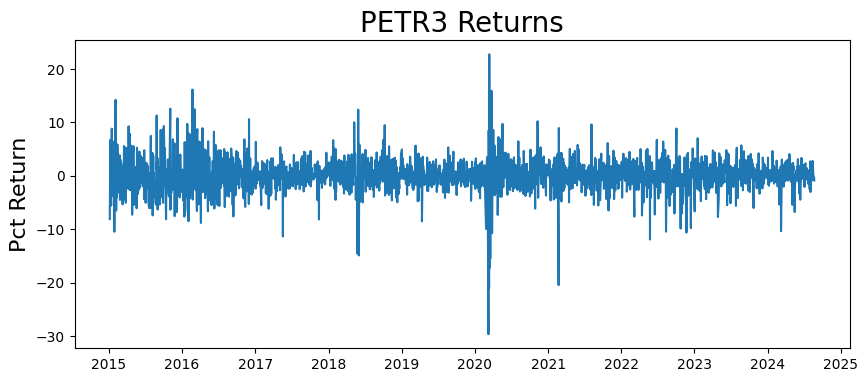

In [46]:
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Pct Return', fontsize=16)
plt.title('PETR3 Returns', fontsize=20)

## PACF

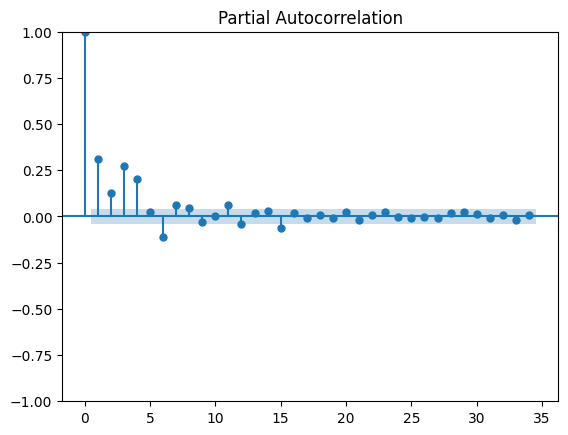

In [47]:
plot_pacf(returns**2)
plt.show()

# GARCH(4,4)

In [48]:
model = arch_model(returns, p=4, q=4)
model_fit = model.fit()
model_fit.summary()

Iteration:      1,   Func. Count:     12,   Neg. LLF: 156962.171759894
Iteration:      2,   Func. Count:     25,   Neg. LLF: 164360.56874027362
Iteration:      3,   Func. Count:     37,   Neg. LLF: 5870.204362469222
Iteration:      4,   Func. Count:     49,   Neg. LLF: 8334.612283945646
Iteration:      5,   Func. Count:     62,   Neg. LLF: 5895.525063970186
Iteration:      6,   Func. Count:     74,   Neg. LLF: 6582.668448319942
Iteration:      7,   Func. Count:     86,   Neg. LLF: 5911.815109687459
Iteration:      8,   Func. Count:     98,   Neg. LLF: 5843.993795484816
Iteration:      9,   Func. Count:    110,   Neg. LLF: 5792.157196799231
Iteration:     10,   Func. Count:    122,   Neg. LLF: 5791.78286032554
Iteration:     11,   Func. Count:    134,   Neg. LLF: 5782.790609613578
Iteration:     12,   Func. Count:    146,   Neg. LLF: 5780.186651048845
Iteration:     13,   Func. Count:    158,   Neg. LLF: 5790.587016905485
Iteration:     14,   Func. Count:    170,   Neg. LLF: 5778.284476

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -5777.39
Distribution:                  Normal   AIC:                           11574.8
Method:            Maximum Likelihood   BIC:                           11632.6
                                        No. Observations:                 2397
Date:                Fri, Aug 23 2024   Df Residuals:                     2396
Time:                        11:08:03   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1451  5.197e-02      2.791  5.249e-03 [4.321e-02,  0.247]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.6685      0.455      1.469      0.142      [ -0.224,  1.561]
alpha[1]       0.1471  5.642e-02      2.608  9.112e-03    [3.655e-02,  0.258]
alpha[2]       0.0499      0.102      0.487      0.626      [ -0.151,  0.251]
alpha[3]       0.0270  3.387e-02      0.796      0.426 [-3.943e-02,9.334e-02]
alpha[4]       0.0000  3.628e-02      0.000      1.000 [-7.110e-02,7.110e-02]
beta[1]        0.0000      0.666      0.000      1.000      [ -1.305,  1.305]
beta[2]        0.0000  8.240e-02      0.000      1.000      [ -0.162,  0.162]
beta[3]        0.6105  6.649e-02      9.181  4.267e-20      [  0.480,  0.741]
beta[4]        0.0894      0.425      0.210      0.833      [ -0.743,  0.922]
=============================================================================

Covariance estimator: robust
"""

# Trying GARCH(3,0) = ARCH(3)

In [49]:
model = arch_model(returns, p=3, q=0)
model_fit = model.fit()
model_fit.summary()


Iteration:      1,   Func. Count:      7,   Neg. LLF: 10084.50417469193
Iteration:      2,   Func. Count:     16,   Neg. LLF: 11912.07681271101
Iteration:      3,   Func. Count:     25,   Neg. LLF: 20334.938029294055
Iteration:      4,   Func. Count:     32,   Neg. LLF: 32187.296162763465
Iteration:      5,   Func. Count:     39,   Neg. LLF: 6027.9467256313965
Iteration:      6,   Func. Count:     47,   Neg. LLF: 5891.652473639831
Iteration:      7,   Func. Count:     54,   Neg. LLF: 5899.752600452065
Iteration:      8,   Func. Count:     61,   Neg. LLF: 5849.649900538253
Iteration:      9,   Func. Count:     68,   Neg. LLF: 5848.773156714706
Iteration:     10,   Func. Count:     75,   Neg. LLF: 5847.884274624768
Iteration:     11,   Func. Count:     81,   Neg. LLF: 5847.883485030718
Iteration:     12,   Func. Count:     87,   Neg. LLF: 5847.883481359034
Iteration:     13,   Func. Count:     92,   Neg. LLF: 5847.883481358684
Optimization terminated successfully    (Exit mode 0)
       

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -5847.88
Distribution:                  Normal   AIC:                           11705.8
Method:            Maximum Likelihood   BIC:                           11734.7
                                        No. Observations:                 2397
Date:                Fri, Aug 23 2024   Df Residuals:                     2396
Time:                        11:08:03   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1652  5.319e-02      3.106  1.895e-03 [6.097e-02,  0.269]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          4.9291      0.392     12.572  3.026e-36   [  4.161,  5.698]
alpha[1]       0.2245  6.431e-02      3.491  4.808e-04 [9.847e-02,  0.351]
alpha[2]       0.1091  3.058e-02      3.567  3.604e-04 [4.915e-02,  0.169]
alpha[3]       0.1071  3.366e-02      3.181  1.467e-03 [4.111e-02,  0.173]
==========================================================================

Covariance estimator: robust
"""

In [50]:
rolling_predictions = []
test_size = 365

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=3, q=0)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))  

In [51]:
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-365:])

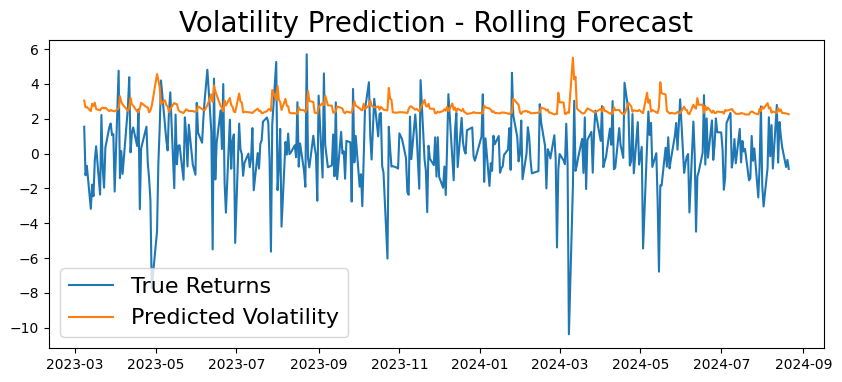

In [52]:
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-365:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)

# S&P 500

In [53]:
spy = yf.download('SPY', start=start, end=end)

[*********************100%***********************]  1 of 1 completed


In [54]:
returns = 100 * spy.Close.pct_change().dropna()

Text(0.5, 1.0, 'SPY Returns')

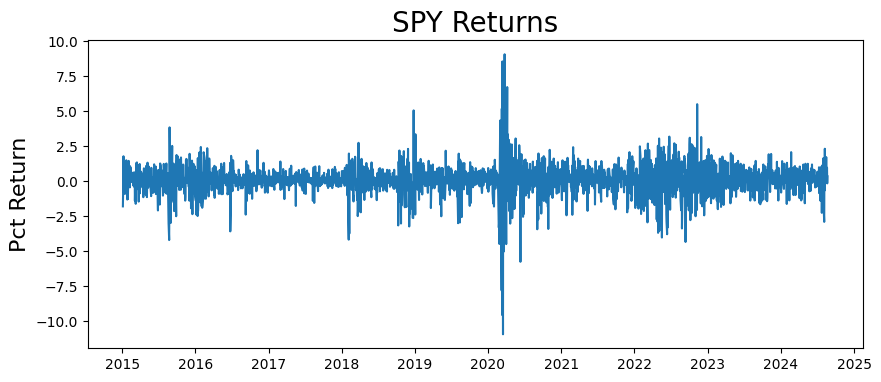

In [55]:
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Pct Return', fontsize=16)
plt.title('SPY Returns', fontsize=20)

## PACF

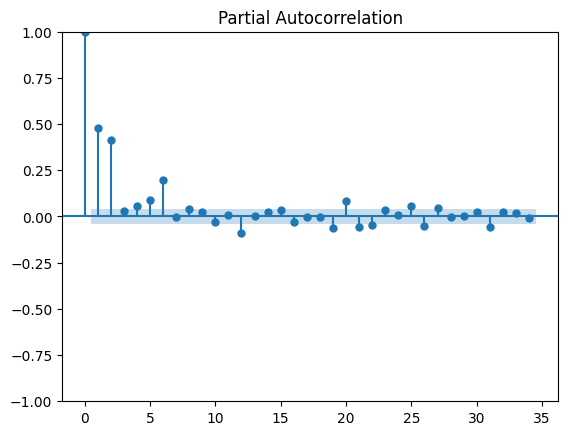

In [56]:
plot_pacf(returns**2)
plt.show()

# Fit GARCH(2,2)


In [57]:
model = arch_model(returns, p=2, q=2)
model_fit = model.fit()
model_fit.summary()


Iteration:      1,   Func. Count:      8,   Neg. LLF: 16196.846283795867
Iteration:      2,   Func. Count:     20,   Neg. LLF: 12107.223514177404
Iteration:      3,   Func. Count:     31,   Neg. LLF: 4937.436809491117
Iteration:      4,   Func. Count:     40,   Neg. LLF: 4300.74066260075
Iteration:      5,   Func. Count:     48,   Neg. LLF: 3336.8890763703944
Iteration:      6,   Func. Count:     57,   Neg. LLF: 3113.871920155507
Iteration:      7,   Func. Count:     64,   Neg. LLF: 3114.5622646501706
Iteration:      8,   Func. Count:     73,   Neg. LLF: 3113.709324414759
Iteration:      9,   Func. Count:     80,   Neg. LLF: 3113.658888019382
Iteration:     10,   Func. Count:     87,   Neg. LLF: 3113.655308318412
Iteration:     11,   Func. Count:     94,   Neg. LLF: 3113.6549298864547
Iteration:     12,   Func. Count:    101,   Neg. LLF: 3113.654916335984
Iteration:     13,   Func. Count:    107,   Neg. LLF: 3113.6549163366117
Optimization terminated successfully    (Exit mode 0)
     

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -3113.65
Distribution:                  Normal   AIC:                           6239.31
Method:            Maximum Likelihood   BIC:                           6274.07
                                        No. Observations:                 2424
Date:                Fri, Aug 23 2024   Df Residuals:                     2423
Time:                        11:08:10   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0832  1.504e-02      5.532  3.167e-08 [5.374e-02,  0.113]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0652  1.723e-02      3.783  1.551e-04 [3.141e-02,9.897e-02]
alpha[1]       0.1752  3.558e-02      4.925  8.448e-07     [  0.105,  0.245]
alpha[2]       0.1630  3.566e-02      4.570  4.882e-06   [9.306e-02,  0.233]
beta[1]        0.0177      0.102      0.173      0.862     [ -0.182,  0.218]
beta[2]        0.5963  8.178e-02      7.292  3.055e-13     [  0.436,  0.757]
============================================================================

Covariance estimator: robust
"""

## Rolling Forecast

In [58]:
rolling_predictions = []
test_size = 365*5

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=2, q=2)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

In [59]:
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-365*5:])

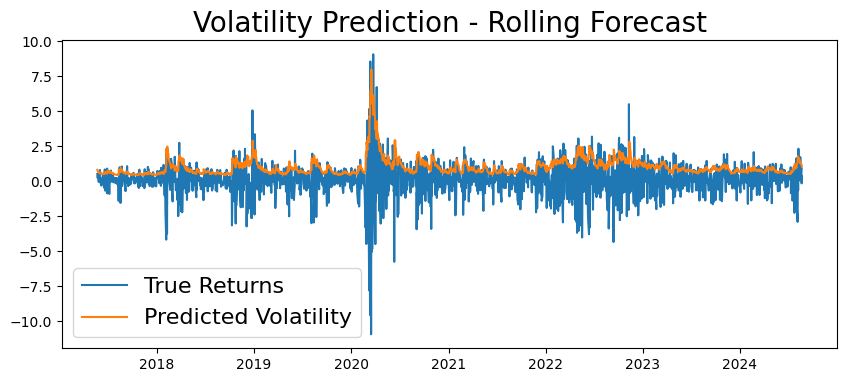

In [60]:
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-365*5:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)

# Using the Model

In [61]:
train = returns
model = arch_model(train, p=2, q=2)
model_fit = model.fit(disp='off')

In [62]:
pred = model_fit.forecast(horizon=7)
future_dates = [returns.index[-1] + timedelta(days=i) for i in range(1,8)]
pred = pd.Series(np.sqrt(pred.variance.values[-1,:]), index=future_dates)

Text(0.5, 1.0, 'Volatility Prediction - Next 7 Days')

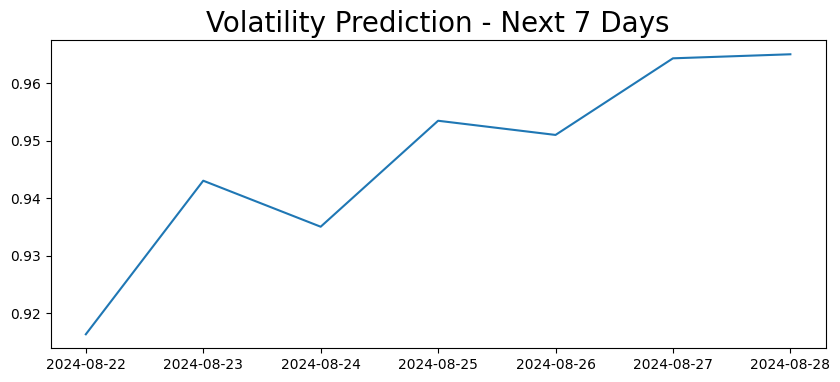

In [63]:
plt.figure(figsize=(10,4))
plt.plot(pred)
plt.title('Volatility Prediction - Next 7 Days', fontsize=20)